In [16]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10 32x32x3

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train =  tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6

testing_loss_history = []
training_loss_history = []
testing_acc_history = []
training_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

indices = np.arange(Ntr)

for t in range(iterations):
    rng.shuffle(indices)#Shuffling the dataset
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1) + b1
    y_test_pred=x_test.dot(w1)+b1

    testing_loss=1./Nte*(np.square(y_test_pred-y_test)).sum() + reg * np.sum(w1*w1)
    training_loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1)
    testing_loss_history.append(testing_loss)
    training_loss_history.append(training_loss)

    training_acc = 1.0 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
    training_acc_history.append(training_acc)
    testing_acc = 1.0 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_test_pred,axis=1))).sum()
    testing_acc_history.append(testing_acc)

    if t%10==0:
        print('epoch = ', t, ' train loss = ', training_loss ,' test loss =  ', testing_loss, ' train accuracy = ', training_loss, 'test accuracy = ', testing_acc)

    # Backward pass

    dy_pred=1./batch_size*2.0*(y_pred-y)#partial differentiation
    dw1=x.T.dot(dy_pred) + reg * w1
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay



w1: (3072, 10)
b1: (10,)
epoch =  0  train loss =  0.9999579940498977  test loss =   0.9999637231497743  train accuracy =  0.9999579940498977 test accuracy =  0.6793
epoch =  10  train loss =  0.876636610485965  test loss =   0.8762383542689327  train accuracy =  0.876636610485965 test accuracy =  0.75801
epoch =  20  train loss =  0.8425391875659117  test loss =   0.8424168535463774  train accuracy =  0.8425391875659117 test accuracy =  0.7678699999999999
epoch =  30  train loss =  0.8236149189835474  test loss =   0.8237140964384874  train accuracy =  0.8236149189835474 test accuracy =  0.77042
epoch =  40  train loss =  0.8123875580488747  test loss =   0.8127058391640641  train accuracy =  0.8123875580488747 test accuracy =  0.7715799999999999
epoch =  50  train loss =  0.8054249186391894  test loss =   0.8059685216219835  train accuracy =  0.8054249186391894 test accuracy =  0.77286
epoch =  60  train loss =  0.8009046872362554  test loss =   0.8016776338501729  train accuracy =  

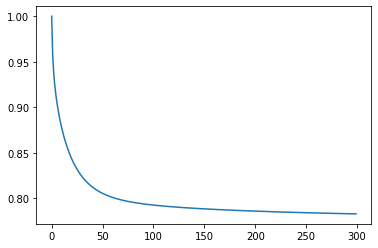

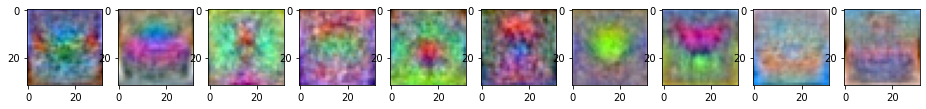

In [17]:
import cv2 as cv

plt.plot(training_loss_history)
f, axarr = plt.subplots(1, 10)
f.set_size_inches(16, 6)
import cv2 as cv

for i in range(10):
    img = w1[:,i].reshape(32,32,3)
    img=cv.normalize(img, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    axarr[i].imshow(img)
    cv.imwrite('l.jpg', img)
plt.show()